# Exploratory Data Analysis

File Name: exploratory_data_analysis.ipynb
Purpose: Data visualization
Outline:
1. Location Map: Fig1
2. Geolocation of spills: Fig2
3. Draw Tradeoff plot (Fig3a)
4. Draw cluster (Fig3b)

Developer: Tanmoy Das
Date: March 2023

In [2]:
# Import Python libraries
import pandas as pd

import geopandas as gpd
import shapely
import custom_func, eda

import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

H:\My Drive\PhD Tan 2023\Python Implementation of MIPs\MIP-Python-Lamoscad\eda.py:61: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  linestring = geom.explode()
H:\My Drive\PhD Tan 2023\Python Implementation of MIPs\MIP-Python-Lamoscad\mip_venv\Lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [4]:
#
# Load geometric file for map
ArcticMap = gpd.read_file("Inputs/ArcGIS_data/ArcticShapefile2/ArcticShapefile2.shp")
ArcticMap = ArcticMap.to_crs(epsg=4326)  # 3857
ArcticLand = ArcticMap[ArcticMap['Region_EN'].isin(['Arctic'])]
ArcticWater = ArcticMap[ArcticMap['Region_EN'].isin(['Arctic-Water'])]

current_st = pd.read_excel('Inputs/data_oil_spill_resource_allocation_Arctic_2023.xlsx', sheet_name='current')
acp = pd.read_excel('Inputs/data_oil_spill_resource_allocation_Arctic_2023.xlsx', sheet_name='stations')

In [5]:
coordinates_current_st = custom_func.extract_station_coordinate(current_st)
coordinate_current_st_df = pd.DataFrame(coordinates_current_st[0])
coordinate_current_st_df.columns = ['Latitude','Longitude']
coordinate_current_st_df['Capacity'] = current_st['Capacity'].copy()
coordinate_current_st_df['FacilityLocation'] = current_st['FacilityLocation'].copy()

coordinates_acp = custom_func.extract_station_coordinate(acp)
coordinate_df_acp = pd.DataFrame(coordinates_acp[0])
coordinate_df_acp.columns = ['Latitude','Longitude']
coordinate_df_acp['Capacity'] = acp['Capacity'].copy()

# Fig3

## (a) Current response stations and cache

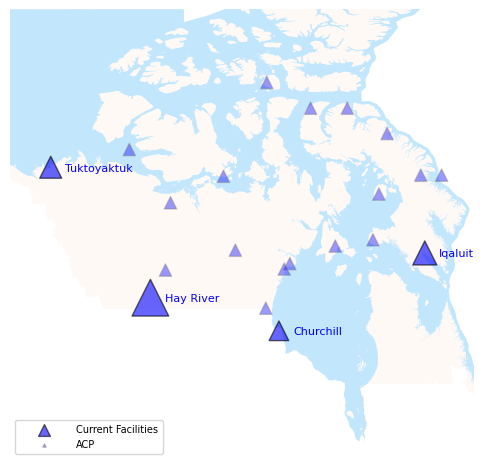

In [6]:
fig, ax = plt.subplots(figsize=(5,5))
ArcticLandPlot = ArcticLand.plot(ax=ax, color="seashell", alpha=.5)  # ax=ax,
ArcticWaterPlot = ArcticWater.plot(ax=ax, color="lightskyblue", alpha=.5)

st = plt.scatter(data=coordinate_current_st_df,
                 x='Longitude', y='Latitude', marker='^', alpha=0.6, s='Capacity',
                 c='blue', edgecolors='black')

for i in range(len(coordinate_current_st_df)):
    plt.text(x=coordinate_current_st_df.Longitude[i] + 2.5, y=coordinate_current_st_df.Latitude[i] - .25,
             s=coordinate_current_st_df.FacilityLocation[i],  # loc[:, 'Station #'][i],
             fontdict=dict(color='blue', size=8))
# Facility location

acp = plt.scatter(data=coordinate_df_acp,
                 x='Longitude', y='Latitude', marker='^', alpha=0.4, s='Capacity',
                 c='blue', edgecolors='gray')

plt.legend((st, acp),
           ('Current Facilities', 'ACP'),
           loc='lower left',
           ncol=1, handlelength=5, borderpad=.5, markerscale=.4,
           fontsize=7)

ax.set_xlim([-140,-60])
ax.set_ylim([50, 80])
ax.grid(False)
plt.axis('off')
#plt.show()
plt.tight_layout()
fig.savefig(f'Outputs/Fig3a current facilities & cache.png', transparent=True)

## (b) Sensitive areas

In [7]:
# Load geometric file for map
gerome_ = gpd.read_file("Inputs/ArcGIS_data/Gerome2/Sensitivity_data_Gerome.shp")
marine_protective_area = gpd.read_file("Inputs/ArcGIS_data/Northern_Canada_2011/shapefiles/LCC_NAD83/prot_areas_p.shp")
indigenous_population = gpd.read_file("Inputs/ArcGIS_data/Northern_Canada_2011/shapefiles/LCC_NAD83/popplace_pt.shp")
gerome_shp = gerome_.to_crs(epsg=4326)
marine_protective_area = marine_protective_area.to_crs(epsg=4326)
indigenous_population_area = indigenous_population.to_crs(epsg=4326)

In [8]:
gerome_shp['Sensitivity_n'] = (gerome_shp['Sensitivit']-min(gerome_shp['Sensitivit']))/(max(gerome_shp['Sensitivit'])-min(gerome_shp['Sensitivit']))

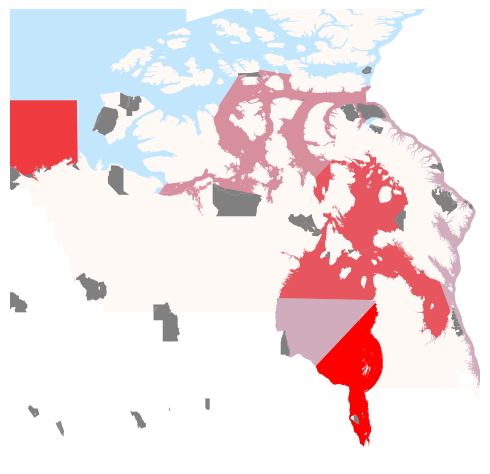

In [9]:
fig, ax = plt.subplots(figsize=(5,5))  #++ figsize=(8,8)
ArcticLandPlot = ArcticLand.plot(ax=ax, color="seashell", alpha=.5)  # ax=ax,
ArcticWaterPlot = ArcticWater.plot(ax=ax, color="lightskyblue", alpha=.5)

gerome_plot = gerome_shp.plot(ax=ax, color='red', alpha=gerome_shp['Sensitivity_n']) # color="lightskyblue",
mpa_plot = marine_protective_area.plot(ax=ax, color='gray', zorder=2)


ax.set_xlim([-140,-60])
ax.set_ylim([50, 80])
ax.axis('off')
plt.tight_layout()
fig.savefig(f'Outputs/Fig 3b Sensitivity only.png', transparent=True)

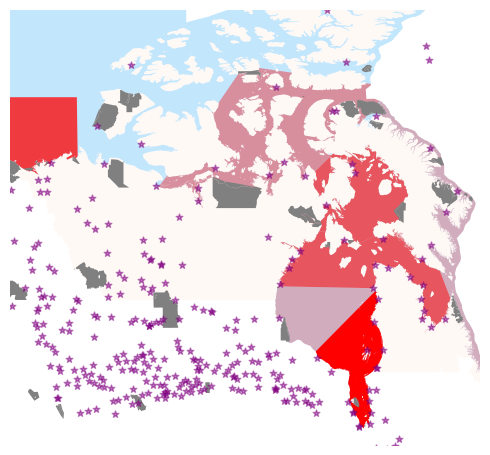

In [10]:
fig, ax = plt.subplots(figsize=(5,5))  #++ figsize=(8,8)
ArcticLandPlot = ArcticLand.plot(ax=ax, color="seashell", alpha=0.5)  # ax=ax,
ArcticWaterPlot = ArcticWater.plot(ax=ax, color="lightskyblue", alpha=0.5)

gerome_plot = gerome_shp.plot(ax=ax, color='red', alpha=gerome_shp['Sensitivity_n']) # color="lightskyblue",
mpa_plot = marine_protective_area.plot(ax=ax, color='gray', zorder=2)

mpa_plot = indigenous_population_area.plot(ax=ax, marker='*',markersize=25, color='purple', zorder=3, alpha=.5)


ax.set_xlim([-140,-60])
ax.set_ylim([50, 80])
ax.axis('off')
plt.tight_layout()
fig.savefig(f'Outputs/Fig3b Sensitivity & population.png', transparent=True)

## (c) Shipping route

## (d) Oil spills

# Transparent Figures for presentation

## Current facilities

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))


st = plt.scatter(data=coordinate_current_st_df,
                 x='Longitude', y='Latitude', marker='^', alpha=0.6, s='Capacity',
                 c='blue', edgecolors='black')

for i in range(len(coordinate_current_st_df)):
    plt.text(x=coordinate_current_st_df.Longitude[i] + 2.5, y=coordinate_current_st_df.Latitude[i] - .25,
             s=coordinate_current_st_df.FacilityLocation[i],  # loc[:, 'Station #'][i],
             fontdict=dict(color='blue', size=8))
# Facility location

acp = plt.scatter(data=coordinate_df_acp,
                 x='Longitude', y='Latitude', marker='^', alpha=0.4, s='Capacity',
                 c='blue', edgecolors='gray')

plt.legend((st, acp),
           ('Current Facilities', 'ACP'),
           loc='lower left',
           ncol=1, handlelength=5, borderpad=.5, markerscale=.4,
           fontsize=7)

ax.set_xlim([-140,-60])
ax.set_ylim([50, 80])
ax.grid(False)
plt.axis('off')
#plt.show()
plt.tight_layout()
fig.savefig(f'Outputs/Fig4a current facilities & cache.png', transparent=True)

## Proposed station coordinates

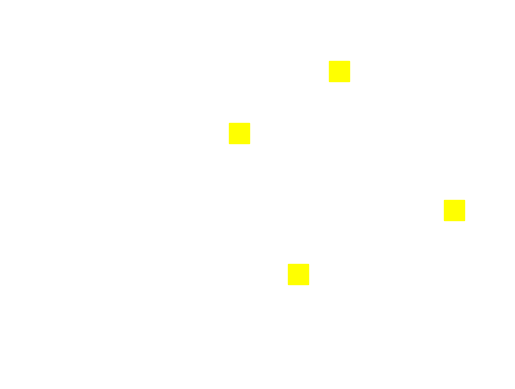

In [9]:
#
dataframe = pd.read_excel('Outputs/current vs proposed.xlsx', sheet_name='proposed coordinates')


fig, ax = plt.subplots() #figsize=(8,3)
coordinates_spill = custom_func.extract_station_coordinate(dataframe)
coordinate_df = pd.DataFrame(coordinates_spill[0])
coordinate_df.columns = ['Latitude','Longitude']
coordinate_gdf = gpd.GeoDataFrame(
    coordinate_df, geometry=gpd.points_from_xy(coordinate_df.Longitude, coordinate_df.Latitude))
coordinate_gdf = coordinate_gdf.set_crs(epsg=4326)
st = plt.scatter(data=coordinate_df,
                 x='Longitude', y='Latitude', marker='s', alpha=1, s=200,
                 c='yellow')
ax.set_xlim([-140,-60])
ax.set_ylim([50, 80])
ax.axis('off')
fig.savefig(f'Outputs/proposed_stations.png', transparent=True)

## Shapefile to transparent fig

## Shipping Route

++ need to replace Fig3(c)

In [20]:
import eda
import geopandas as gpd
file_url = "Inputs/ArcGIS_data/Shipping_and_Hydrography/Canadian_Shipping_Routes.shp"
name = 'shipping_route'
#Map_Plot = eda.plot_shp_to_transparent_fig(file_url, name)

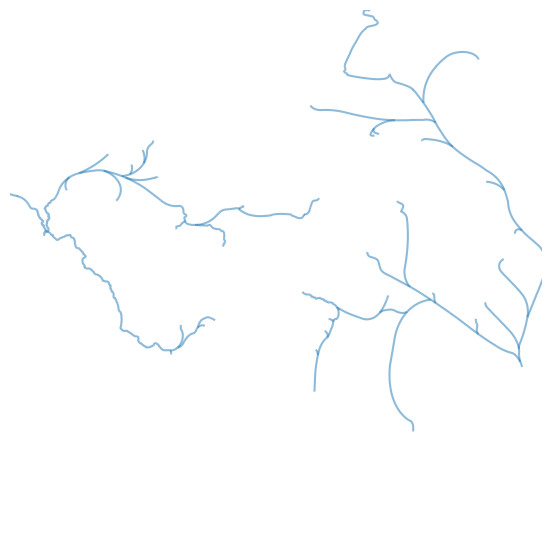

In [21]:
fig, ax = plt.subplots(figsize=(8,7))  #++ figsize=(8,8)
# plt.figure()
# Load geometric file for map
Map_shp = gpd.read_file(file_url)
Map_shp = Map_shp.to_crs(epsg=4326)  # 3857
Map_Plot = Map_shp.plot(ax=ax,  alpha=.5) # color="lightskyblue",
ax.set_xlim([-140,-60])
ax.set_ylim([50, 80])
ax.grid(False)
ax.axis('off')
fig.savefig(f'Outputs/{name}.png', transparent=True)

## Sensitivity


C:\Users\tanmo\OneDrive - Dalhousie University\PhD Tanmoy Das\Multiobjective-Optimization-of-Resource-Allocation\eda.py:59: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  linestring = geom.explode()
C:\Users\tanmo\OneDrive - Dalhousie University\PhD Tanmoy Das\Multiobjective-Optimization-of-Resource-Allocation\multiobjective_location_allocation_env\Lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


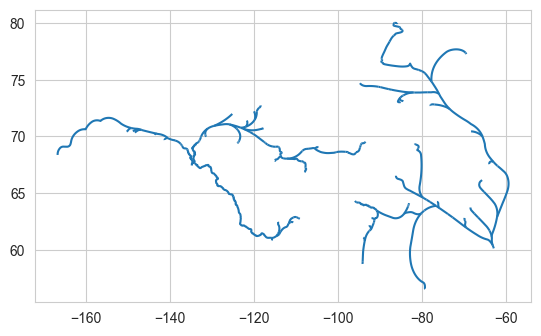

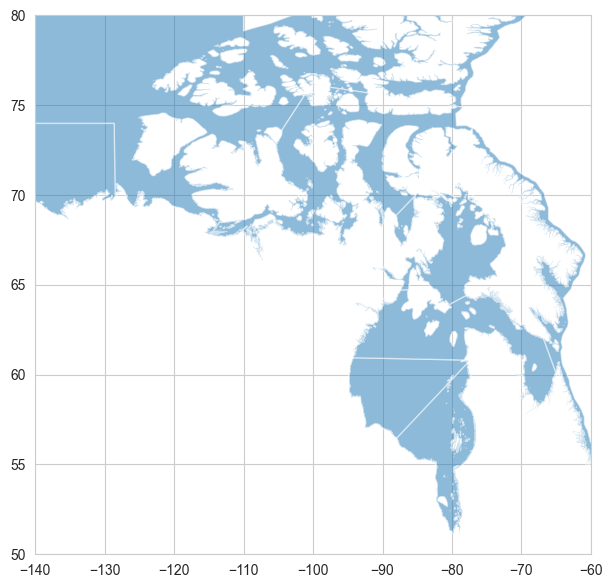

In [10]:
import eda
file_url = "Inputs/ArcGIS_data/Gerome2/Sensitivity_data_Gerome.shp"
name = 'Sensitivity'
eda.plot_shp_to_transparent_fig(file_url, name)

In [11]:
import geopandas as gpd
# plt.figure()
# Load geometric file for map
Map_shp = gpd.read_file(file_url)
Map_shp = Map_shp.to_crs(epsg=4326)  # 3857
Map_shp

,OBJECTID,Name,Nom,Inuktitut,Sensitivit,Shape_Leng,Shape_Area,geometry
0,3,Arctic-Water,Arctique-Eau,ᐅᑭᐅᖅᑕᖅᑐᖅ,2.0,1147.511909,328.048958,"POLYGON ((-78.55335 74.89394, -79.48762 74.947..."
1,3,Arctic-Water,Arctique-Eau,ᐅᑭᐅᖅᑕᖅᑐᖅ,4.0,59.881779,46.438061,"POLYGON ((-77.81897 60.61790, -77.82349 60.616..."
2,3,Arctic-Water,Arctique-Eau,ᐅᑭᐅᖅᑕᖅᑐᖅ,10.0,182.652950,44.649343,"POLYGON ((-77.62620 59.70276, -77.62997 59.702..."
3,3,Arctic-Water,Arctique-Eau,ᐅᑭᐅᖅᑕᖅᑐᖅ,7.0,334.995051,71.712847,"POLYGON ((-74.05052 64.69202, -74.06466 64.694..."
4,3,Arctic-Water,Arctique-Eau,ᐅᑭᐅᖅᑕᖅᑐᖅ,4.0,552.022943,31.118305,"POLYGON ((-57.38534 54.14958, -57.37456 54.147..."
5,3,Arctic-Water,Arctique-Eau,ᐅᑭᐅᖅᑕᖅᑐᖅ,8.0,77.723227,55.606925,"POLYGON ((-128.48285 69.90550, -128.49867 69.9..."
6,3,Arctic-Water,Arctique-Eau,ᐅᑭᐅᖅᑕᖅᑐᖅ,7.0,253.592294,48.824293,"POLYGON ((-73.80861 68.56542, -73.82976 68.566..."
7,3,Arctic-Water,Arctique-Eau,ᐅᑭᐅᖅᑕᖅᑐᖅ,5.0,592.115718,92.393179,"POLYGON ((-94.79544 75.83231, -94.79201 75.811..."


In [12]:
Map_shp['Sensitivity_n'] = (Map_shp['Sensitivit']-min(Map_shp['Sensitivit']))/(max(Map_shp['Sensitivit'])-min(Map_shp['Sensitivit']))


In [22]:
display(Map_shp)

,OBJECTID,Name,Nom,Inuktitut,Sensitivit,Shape_Leng,Shape_Area,geometry,Sensitivity_n
0,3,Arctic-Water,Arctique-Eau,ᐅᑭᐅᖅᑕᖅᑐᖅ,2.0,1147.511909,328.048958,"POLYGON ((-78.55335 74.89394, -79.48762 74.947...",0.000
1,3,Arctic-Water,Arctique-Eau,ᐅᑭᐅᖅᑕᖅᑐᖅ,4.0,59.881779,46.438061,"POLYGON ((-77.81897 60.61790, -77.82349 60.616...",0.250
2,3,Arctic-Water,Arctique-Eau,ᐅᑭᐅᖅᑕᖅᑐᖅ,10.0,182.652950,44.649343,"POLYGON ((-77.62620 59.70276, -77.62997 59.702...",1.000
3,3,Arctic-Water,Arctique-Eau,ᐅᑭᐅᖅᑕᖅᑐᖅ,7.0,334.995051,71.712847,"POLYGON ((-74.05052 64.69202, -74.06466 64.694...",0.625
4,3,Arctic-Water,Arctique-Eau,ᐅᑭᐅᖅᑕᖅᑐᖅ,4.0,552.022943,31.118305,"POLYGON ((-57.38534 54.14958, -57.37456 54.147...",0.250
5,3,Arctic-Water,Arctique-Eau,ᐅᑭᐅᖅᑕᖅᑐᖅ,8.0,77.723227,55.606925,"POLYGON ((-128.48285 69.90550, -128.49867 69.9...",0.750
6,3,Arctic-Water,Arctique-Eau,ᐅᑭᐅᖅᑕᖅᑐᖅ,7.0,253.592294,48.824293,"POLYGON ((-73.80861 68.56542, -73.82976 68.566...",0.625
7,3,Arctic-Water,Arctique-Eau,ᐅᑭᐅᖅᑕᖅᑐᖅ,5.0,592.115718,92.393179,"POLYGON ((-94.79544 75.83231, -94.79201 75.811...",0.375


[0    0.000
 1    0.250
 2    1.000
 3    0.625
 4    0.250
 5    0.750
 6    0.625
 7    0.375
 Name: Sensitivit, dtype: float64]

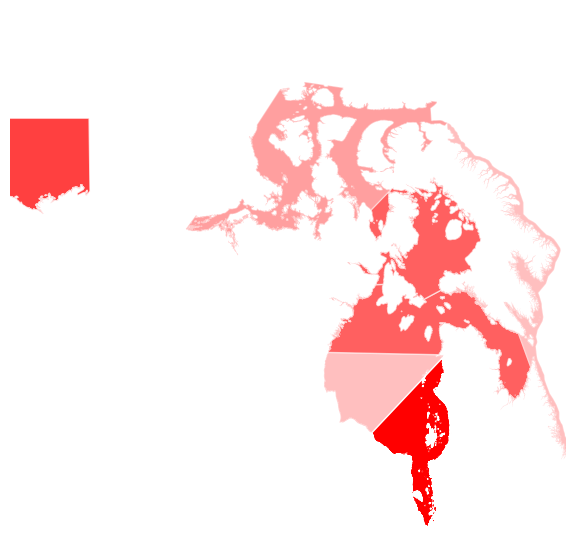

In [13]:
fig, ax = plt.subplots(figsize=(8,7))  #++ figsize=(8,8)
Map_Plot = Map_shp.plot(ax=ax, color='red', alpha=Map_shp['Sensitivity_n']) # color="lightskyblue",
ax.set_xlim([-140,-60])
ax.set_ylim([50, 80])
ax.axis('off')
fig.savefig(f'Outputs/{name}.png', transparent=True)

In [16]:
max(Map_shp['Sensitivit'])

10.0

## Spill coordinates as transparent fig

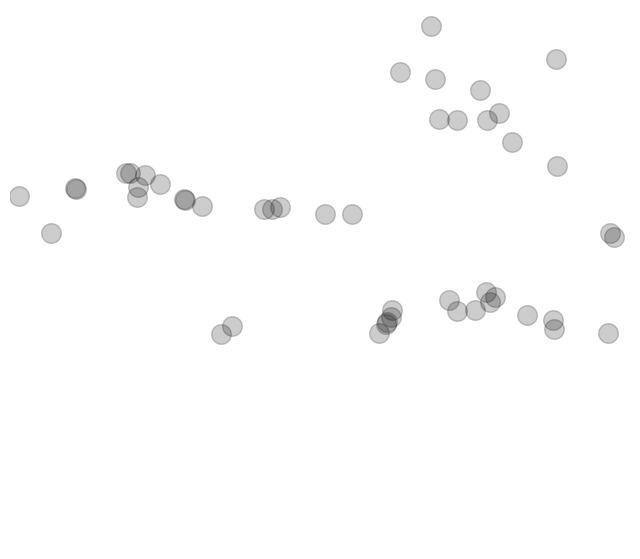

In [15]:
import eda
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import custom_func

spill_data = pd.read_excel('Inputs/data_oil_spill_resource_allocation_Arctic_2023.xlsx', sheet_name='spills', header=0).copy()
spill_data = spill_data.sample(n=50)
name = 'spill points'

fig, ax = plt.subplots(figsize=(8,7))
coordinates = custom_func.extract_coordinate(spill_data)
coordinate_df = pd.DataFrame(coordinates[0])
coordinate_df.columns = ['Latitude', 'Longitude']
coordinate_gdf = gpd.GeoDataFrame(
    coordinate_df, geometry=gpd.points_from_xy(coordinate_df.Longitude, coordinate_df.Latitude))
coordinate_gdf = coordinate_gdf.set_crs(epsg=4326)

plt.scatter(data=coordinate_gdf,
                 x='Longitude', y='Latitude', marker='o', alpha=.2, s=200,
                 # s=amountSt_groupby['amountSt_display'],
                 c='black')
ax.set_xlim([-140, -60])
ax.set_ylim([50, 80])
ax.axis('off')
fig.savefig(f'Outputs/{name}.png', transparent=True)

In [ ]:
import geopandas as gpd
fig, ax = plt.subplots(figsize=(8,7))  #++ figsize=(8,8)
# plt.figure()
# Load geometric file for map
ArcticMap = gpd.read_file("Inputs/ArcGIS_data/ArcticShapefile2/ArcticShapefile2.shp")
ArcticMap = ArcticMap.to_crs(epsg=4326)  # 3857
ArcticLand = ArcticMap[ArcticMap['Region_EN'].isin(['Arctic'])]
ArcticWater = ArcticMap[ArcticMap['Region_EN'].isin(['Arctic-Water'])]
ArcticLandPlot = ArcticLand.plot(ax=ax, color="seashell", alpha=.5)  # ax=ax,
ArcticWaterPlot = ArcticWater.plot(ax=ax, color="lightskyblue", alpha=.5)
ax.set_xlim([-140,-60])
ax.set_ylim([50, 80])
fig.savefig(f'Outputs/Arctic_transparent.png', transparent=True)
# plt.show()